In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import pickle
import matplotlib.pyplot as plt

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dla-1-2/m21/lms/starter/charity_data.csv")

# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN', 'NAME'])

# Choose a cutoff value of 500 and create a list of application types to be replaced
all_app_types = application_df['APPLICATION_TYPE'].value_counts().to_dict()
application_types_to_replace = [i for i in all_app_types.keys() if all_app_types[i] < 500]

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
all_class_types = application_df['CLASSIFICATION'].value_counts().to_dict()
classifications_to_replace = [i for i in all_class_types.keys() if all_class_types[i] < 1000]

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Get all categorical data columns into a list
dummies_cols = []

cols = application_df.columns
typs = application_df.dtypes.values

for c in range(len(cols)):
    if (typs[c] == 'object'):
        dummies_cols.append(cols[c])

# Convert categorical data to numeric with `pd.get_dummies`
dummies_df = pd.get_dummies(application_df[dummies_cols])

# Concatenate the DF with the dummy data with the original dataset
concat_df = pd.concat([application_df, dummies_df], axis=1)

# Drop the unused columns
concat_df = concat_df.drop(columns=dummies_cols)

# Split our preprocessed data into our features and target arrays
y = concat_df['IS_SUCCESSFUL']
X = concat_df.drop(columns='IS_SUCCESSFUL')

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [4]:
from sklearn.tree import DecisionTreeClassifier
# Local module
from ml_classification import model_performance

# Test max depth between 1 and 11
depths = list(range(1,20))

# Create empty list to save results
metrics = []

for depth in depths:

    print(f"Depth: {depth}/{len(depths)}")

    # Creating the decision tree classifier instance
    model_4 = DecisionTreeClassifier(max_depth=depth)

    # Fitting the model
    model_4 = model_4.fit(X_train_scaled, y_train)

    # Making predictions using the testing data
    predictions_4 = model_4.predict(X_test_scaled)

    # Model performance (do not print the output)
    model_4_metrics = model_performance(y_test, predictions_4, False)

    # Add an element to store the max depth
    model_4_metrics['max_depth'] = depth

    # Add the dictionary to the metrics list
    metrics.append(model_4_metrics)

# Save the metrics to a DataFrame
metrics_df = pd.DataFrame(metrics)

# Reorder the colunms
metrics_df = metrics_df[['max_depth', 'accuracy', 'precision_0', 'precision_1', 'recall_0', 'recall_1']]
metrics_df.sort_values('accuracy', ascending=False)

Depth: 1/19
Depth: 2/19
Depth: 3/19
Depth: 4/19
Depth: 5/19
Depth: 6/19
Depth: 7/19
Depth: 8/19
Depth: 9/19
Depth: 10/19
Depth: 11/19
Depth: 12/19
Depth: 13/19
Depth: 14/19
Depth: 15/19
Depth: 16/19
Depth: 17/19
Depth: 18/19
Depth: 19/19


,max_depth,accuracy,precision_0,precision_1,recall_0,recall_1
8,9,0.726181,0.723347,0.728337,0.669498,0.775809
7,8,0.726064,0.722911,0.728469,0.669998,0.775153
6,7,0.725131,0.728865,0.722434,0.654759,0.786745
10,11,0.724431,0.719957,0.727873,0.670497,0.771654
12,13,0.723965,0.721320,0.725968,0.666000,0.774716
16,17,0.723499,0.717600,0.728083,0.672246,0.768373
13,14,0.723382,0.718223,0.727367,0.670497,0.769685
14,15,0.723265,0.719440,0.726188,0.667499,0.772091
9,10,0.723149,0.722480,0.723647,0.660754,0.777778
5,6,0.722915,0.728063,0.719249,0.648763,0.787839


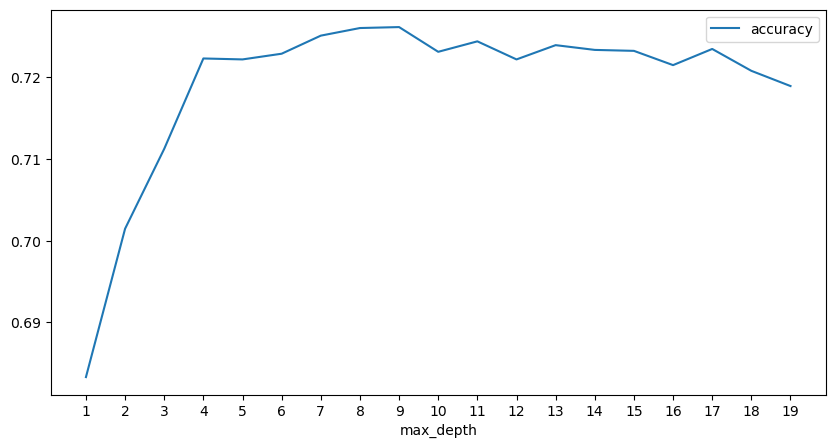

In [6]:
metrics_df.plot.line(x = 'max_depth', y = 'accuracy', figsize = (10,5))
plt.xticks(depths)
plt.show()

In [9]:
from sklearn import tree
import pydotplus
from IPython.display import Image

dot_data = tree.export_graphviz(
    model_4, out_file=None, feature_names=X.columns, class_names=["0","1"], filled=True
)

In [12]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())
graph.write_png('tree.png')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.404876 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.404876 to fit



True